In [1]:
import pandas as pd
import missingno as msno
import plotly.express as px

### NA-Werte überprüfen


<AxesSubplot:>

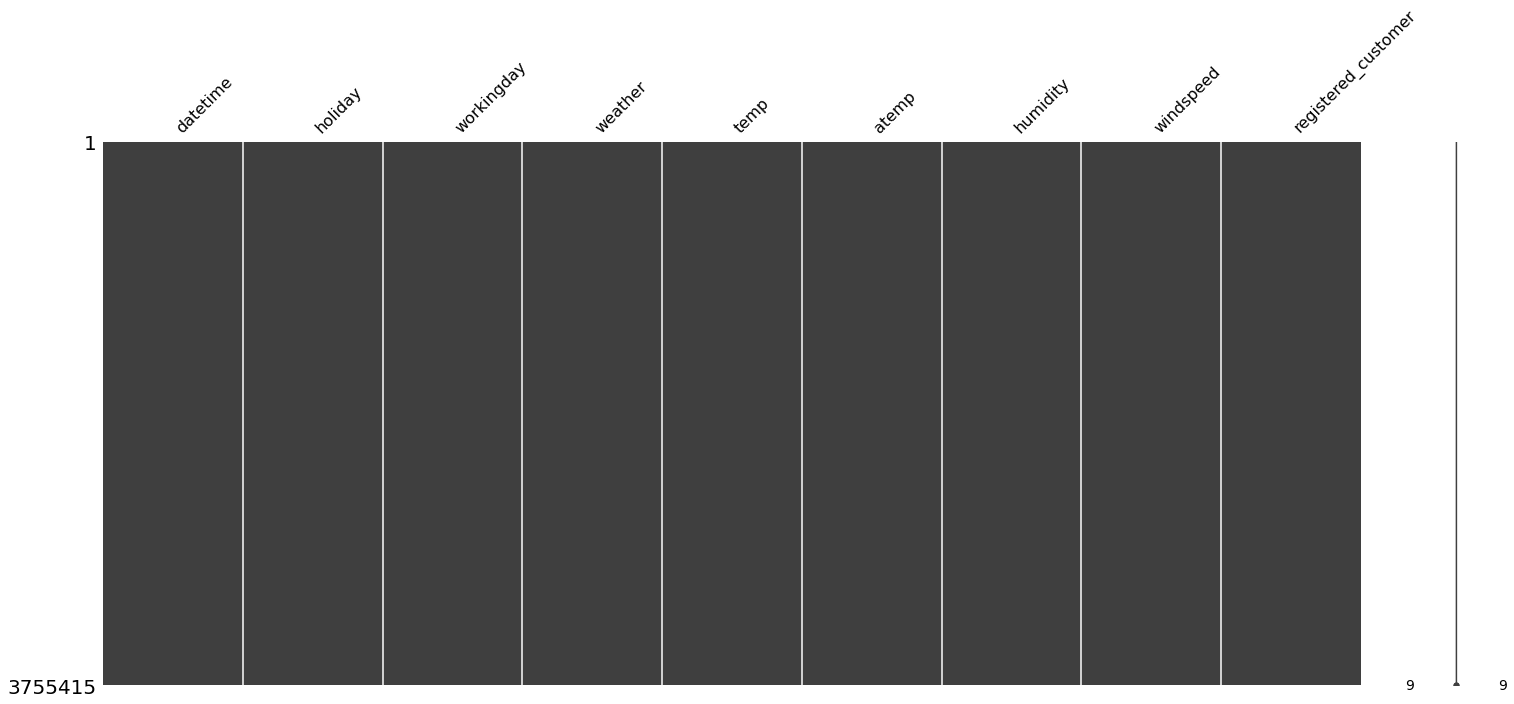

In [2]:
df = pd.read_parquet('/Users/timehmann/Library/Mobile Documents/com~apple~CloudDocs/Studium/Data_Science_Semester3/Data_Analytics_Business_Intelligence/Projekt/escooter_history_2022.parquet')
msno.matrix(df)

### Welche Ausprägungen hat "Weather"

In [3]:
print(df["weather"].unique())

['clear, few clouds' 'cloudy, mist' 'light snow or rain or thunderstorm'
 'heacy rain or thunderstorm or snow or ice pallets']


### Dtypes des Dataframes

In [13]:
print(df.dtypes)

datetime               datetime64[ns]
holiday                       float64
workingday                    float64
weather                        object
temp                          float64
atemp                         float64
humidity                      float64
windspeed                     float64
registered_customer           boolean
dtype: object


In [4]:
print(df.describe())

             holiday    workingday          temp         atemp      humidity  \
count   3.755415e+06  3.755415e+06  3.755415e+06  3.755415e+06  3.755415e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    2.815588e-02  6.909694e-01  2.479423e+01  2.679851e+01  5.722368e+01   
std     1.654180e-01  4.620939e-01  6.327858e+01  8.033991e+00  1.840264e+01   
min     0.000000e+00  0.000000e+00  8.200000e-01  0.000000e+00  0.000000e+00   
25%     0.000000e+00  0.000000e+00  1.722000e+01  2.121000e+01  4.300000e+01   
50%     0.000000e+00  1.000000e+00  2.460000e+01  2.803000e+01  5.600000e+01   
75%     0.000000e+00  1.000000e+00  2.952000e+01  3.257500e+01  7.100000e+01   
max     1.000000e+00  1.000000e+00  3.526000e+03  5.000000e+01  1.000000e+02   

           windspeed registered_custome

In [9]:
print(df[df["temp"] > 100].sort_values(by= "temp", ascending = False))

                  datetime  holiday  workingday            weather    temp  \
749636 2020-08-03 10:17:24      0.0         1.0  clear, few clouds  3526.0   
749631 2020-08-03 10:15:51      0.0         1.0  clear, few clouds  3526.0   
749618 2020-08-03 10:12:04      0.0         1.0  clear, few clouds  3526.0   
749619 2020-08-03 10:12:14      0.0         1.0  clear, few clouds  3526.0   
749620 2020-08-03 10:12:22      0.0         1.0  clear, few clouds  3526.0   
...                    ...      ...         ...                ...     ...   
28410  2020-01-27 10:15:44      0.0         1.0  clear, few clouds   410.0   
28411  2020-01-27 10:16:53      0.0         1.0  clear, few clouds   410.0   
28412  2020-01-27 10:17:04      0.0         1.0  clear, few clouds   410.0   
28413  2020-01-27 10:18:00      0.0         1.0  clear, few clouds   410.0   
28414  2020-01-27 10:18:10      0.0         1.0  clear, few clouds   410.0   

        atemp  humidity  windspeed  registered_customer  
74963

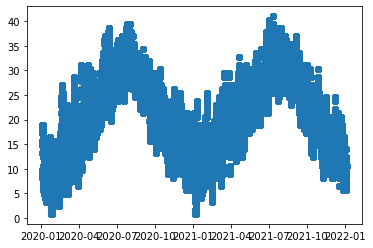

In [15]:
import matplotlib.pyplot as plt

plt.scatter(x=df[df["temp"] < 100]["datetime"], y=df[df["temp"] < 100]["temp"])
plt.show()

In [47]:
df["week"] = (df.sort_values(by='datetime')["datetime"]-df.sort_values(by='datetime')["datetime"][0]).dt.days//7
print(df["week"])

0            0
1            0
2            0
3            0
4            0
          ... 
3755410    104
3755411    104
3755412    104
3755413    104
3755414    104
Name: week, Length: 3755415, dtype: int64


In [51]:
print(df.groupby("week").count()["datetime"])

week
0       9413
1       8354
2       8555
3       7998
4      13625
       ...  
100    46508
101    35943
102    33539
103    28863
104    17416
Name: datetime, Length: 105, dtype: int64


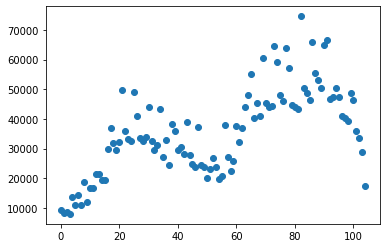

In [52]:
plt.scatter(x = df["week"].unique(), y = df.groupby("week").count()["datetime"])
plt.show()

In [ ]:
from math import ceil


print(f"Q{ceil(df['datetime'][0].month/4)}_{df['datetime'][0].year}")

df["quartal"] = f"Q{df['datetime'].dt.month//4+1}_{df['datetime'].dt.year}"
print(df["quartal"][2000000])
print(df)

In [ ]:
pd.plotting.scatter_matrix(df)